In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("C:/Users/Hp/OneDrive/Desktop/Restaurant Dataset/Dataset .csv")

In [3]:
data.describe(include = "all")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,...,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,...,12,2,2,2,1,NaN,NaN,6,6,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,...,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,Orange,Average,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,...,8652,8393,7100,9517,9551,NaN,NaN,3737,3737,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,...,NaN,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,NaN,156.909748
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,NaN,430.169145
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,NaN,5.000000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,NaN,31.000000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,NaN,131.000000


# Checking for duplicates

In [4]:
data.duplicated().sum()

0

# Checking for null values

In [5]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Group by city and calculate average cost

In [7]:
Cost_by_city = data.groupby("City")["Average Cost for two"].mean().sort_values(ascending = False)

In [8]:
Top_5_city_by_cost = Cost_by_city.head(5)

# Graph of top_10_city_by_cost

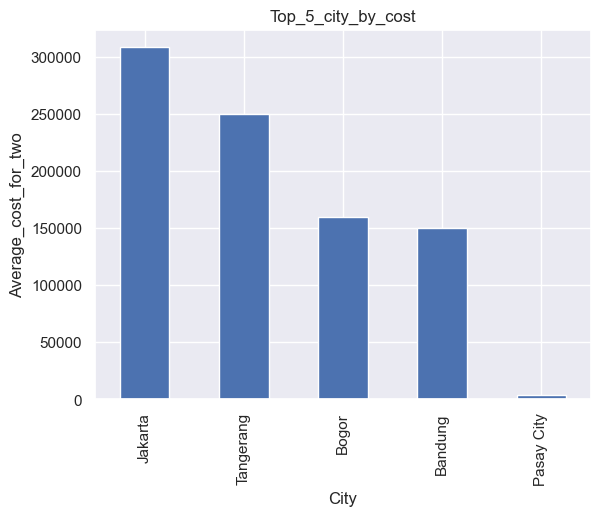

In [9]:
Top_5_city_by_cost.plot(kind = 'bar')
plt.title('Top_5_city_by_cost')
plt.xlabel('City')
plt.ylabel('Average_cost_for_two')
plt.show()

# Group by Cuisines and total number of Votes

In [10]:
Votes_by_cuisines = data.groupby('Cuisines')['Votes'].sum().reset_index()

In [11]:
Votes_by_cuisines

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
2,"Afghani, North Indian",0
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


In [12]:
Votes_by_cuisines[Votes_by_cuisines["Votes"] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


# Checking co-relations by graphs

In [13]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

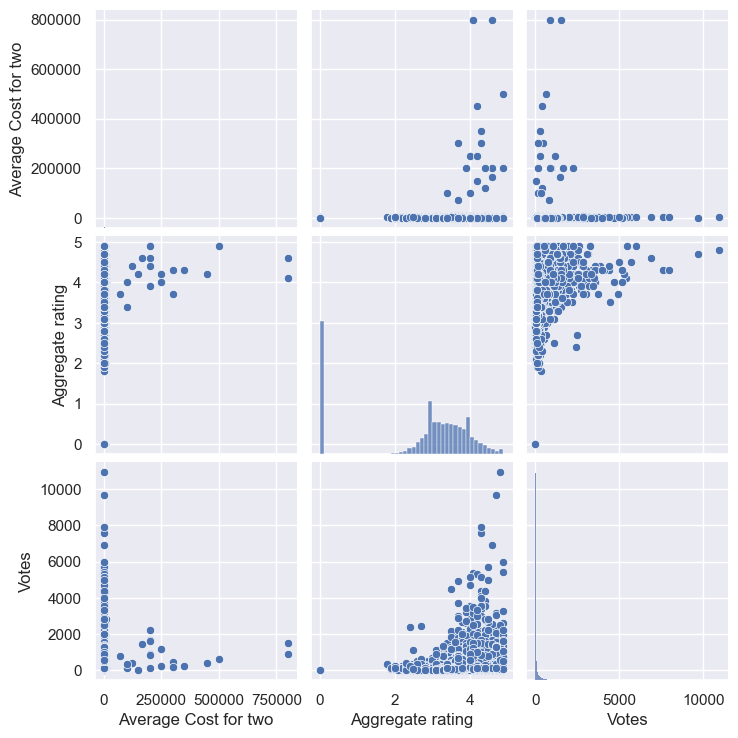

In [14]:
sns.pairplot(data[['Average Cost for two','Aggregate rating','Votes']])

# Online delivery count

In [15]:
has_online_delivery = data['Has Online delivery'].value_counts()

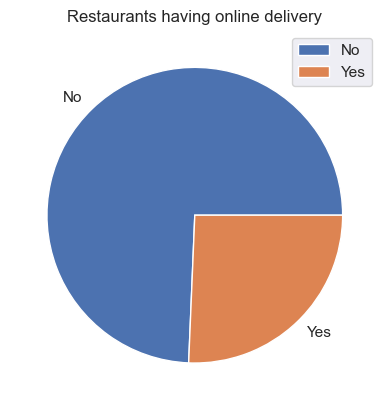

In [16]:
has_online_delivery.plot(kind = 'pie')
plt.title("Restaurants having online delivery")
plt.ylabel("")
plt.legend()

# Filtering Rating text

In [17]:
data = data[data["Rating text"] !='Not rated']

In [18]:
Rating_text = data["Rating text"].value_counts()

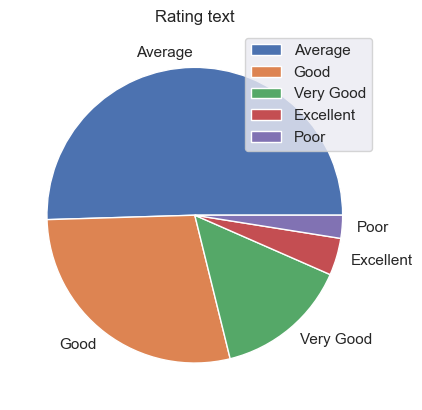

In [19]:
Rating_text.plot(kind = 'pie')
plt.title("Rating text")
plt.ylabel("")
plt.legend()
plt.show()

# Start Modelling

In [20]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [21]:
X = data[["Average Cost for two","Has Table booking","Has Online delivery","Price range","Votes"]]

In [22]:
# Above 2 below 2.5 ....Poor
#  Above 2.5 below 3.5 ...Average
#  Above 3.5 below 4.0 ....Good
#  Above 4.0 below 4.5 ....Very Good
#  Above 4.5 ....Excellent


In [23]:
y = data[["Aggregate rating"]]

# Preprocessing by encoding

In [24]:
from sklearn import preprocessing

In [25]:
labelencoder = preprocessing.LabelEncoder()

In [26]:
X['Has Table booking'] = labelencoder.fit_transform(X['Has Table booking'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_3656\4074334702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Has Table booking'] = labelencoder.fit_transform(X['Has Table booking'])


In [27]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range,Votes
0,1100,1,No,3,314
1,1200,1,No,3,591
2,4000,1,No,4,270
3,1500,0,No,4,365
4,1500,1,No,4,229
...,...,...,...,...,...
9546,80,0,No,3,788
9547,105,0,No,3,1034
9548,170,0,No,4,661
9549,120,0,No,4,901


In [28]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [29]:
X['Has Online delivery'] = labelencoder.fit_transform(X['Has Online delivery'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_3656\2959977150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Has Online delivery'] = labelencoder.fit_transform(X['Has Online delivery'])


In [30]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range,Votes
0,1100,1,0,3,314
1,1200,1,0,3,591
2,4000,1,0,4,270
3,1500,0,0,4,365
4,1500,1,0,4,229
...,...,...,...,...,...
9546,80,0,0,3,788
9547,105,0,0,3,1034
9548,170,0,0,4,661
9549,120,0,0,4,901


In [31]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

# 0 is 'No' and 1 is 'Yes'

# Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X = scaler.fit_transform(X)

In [35]:
X

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644,  0.23335479],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644,  0.81144637],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204,  0.14152796],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204,  0.95753449],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204,  1.45840807],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084,  0.81144637]])

# Splitting train_test split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [38]:
X_train

array([[ 0.00281849, -0.42020641, -0.68302371,  2.18135204, -0.3989981 ],
       [-0.02996429, -0.42020641,  1.46407801,  0.03208084, -0.16734407],
       [-0.0190367 ,  2.37978283,  1.46407801,  1.10671644,  0.59440115],
       ...,
       [-0.07777252, -0.42020641, -0.68302371,  0.03208084,  0.16031072],
       [-0.06547898, -0.42020641,  1.46407801, -1.04255476, -0.37812837],
       [-0.05455138, -0.42020641, -0.68302371, -1.04255476, -0.40734599]])

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [40]:
def modelresult(predictions):
    print("Mean absolute error of model is {}".format(mean_absolute_error(y_test,predictions)))
    print("Root mean squared error of model is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

# Model Building

Linear Model

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
predictionsfromlr = lr.predict(X_test)

In [44]:
modelresult(predictionsfromlr)

Mean absolute error of model is 0.36210090824439695
Root mean squared error of model is 0.4622522687473636


In [45]:
predictionsfromlr

array([[3.95061126],
       [3.20950394],
       [3.13444454],
       ...,
       [3.36074245],
       [3.47453303],
       [3.2123925 ]])

SVR Model

In [46]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [47]:
svrmodel = SVR()

In [48]:
param_gridsvr = { "C":[0.1,0.5], "kernel":["Linear","poly"],"degree" :[2]}

In [49]:
gridsvr = GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(X_train, y_train.values)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['Linear', 'poly']})

In [50]:
predictionsfromsvr = gridsvr.predict(X_test)

In [51]:
modelresult(predictionsfromsvr)

Mean absolute error of model is 0.4003726585961058
Root mean squared error of model is 0.501843222816793


In [52]:
predictionsfromsvr

array([4.16456432, 3.29214727, 3.50302866, ..., 3.30630038, 3.29807167,
       3.30032081])

Decision Tree Regressior

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
param_grid = {
    "max_depth":[10,30],
    "min_samples_leaf" :[1,2],
    "min_samples_split":[2,5]
}

In [55]:
treemodel = DecisionTreeRegressor()

In [56]:
grid_tree = GridSearchCV(estimator = treemodel , param_grid = param_grid)

In [57]:
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [58]:
predictionfromtree = grid_tree.predict(X_test)

In [59]:
modelresult(predictionfromtree)

Mean absolute error of model is 0.2952749235373633
Root mean squared error of model is 0.4069796390808421


In [60]:
predictionfromtree

array([3.83333333, 2.97777778, 3.16060606, ..., 3.17873134, 3.65      ,
       3.00606061])

Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rfmodel = RandomForestRegressor()

In [63]:
param_grid = {"max_depth":[5,15],"n_estimators":[2,5,10]}

In [64]:
gridfr = GridSearchCV(rfmodel, param_grid)

In [65]:
gridfr.fit(X_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed whe

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [66]:
predictionfromrf = gridfr.predict(X_test)

In [67]:
modelresult(predictionfromrf)

Mean absolute error of model is 0.2756954139383612
Root mean squared error of model is 0.3793417525889134


In [68]:
predictionfromrf

array([4.1429414 , 2.98101804, 3.12671485, ..., 3.21536781, 3.58034907,
       3.00599377])

KNN

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn_param_grid = {"n_neighbors":[9,11,13,15,17]}
knn_grid_search = GridSearchCV(knn, knn_param_grid)

In [70]:
knn_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [9, 11, 13, 15, 17]})

In [71]:
predictionsfromknn = knn_grid_search.predict(X_test)

In [72]:
modelresult(predictionsfromknn)

Mean absolute error of model is 0.2885490725662311
Root mean squared error of model is 0.38923864229168


In [73]:
predictionsfromknn

array([[4.3       ],
       [2.97058824],
       [3.07058824],
       ...,
       [3.31176471],
       [3.54117647],
       [3.04705882]])

Ada Boost Regressor

In [74]:
from sklearn.ensemble import AdaBoostRegressor

In [75]:
ada = AdaBoostRegressor()
ada_param_grid = {"n_estimators":[50,100,200],
                 "learning_rate":[0.1,0.5,1]}
ada_grid_search = GridSearchCV(ada, ada_param_grid)

In [76]:
ada_grid_search.fit(X_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [77]:
predictionfromada = ada_grid_search.predict(X_test)

In [78]:
modelresult(predictionfromada)

Mean absolute error of model is 0.2976171711868293
Root mean squared error of model is 0.39493734949422976


In [79]:
predictionfromada

array([4.05406699, 3.06833572, 3.13764777, ..., 3.18062783, 3.34348509,
       3.06833572])

In [80]:
gridfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

# Deploying model

In [81]:
import joblib
joblib.dump(gridfr,"mlmodel.pkl")

['mlmodel.pkl']